In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 15, 1.2),
    ('Oranges', 8, 3.0),
    ('Apples', 5, 2.5),
    ('Bananas', 10, 1.2)
]

In [3]:
with sqlite3.connect("sales_data.db") as conn:
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
    """)
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [4]:
cursor.execute("DELETE FROM sales")

In [5]:
with sqlite3.connect("sales_data.db") as conn:
    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
    """
    df = pd.read_sql_query(query, conn)

📊 Sales Summary:
   product  total_qty  revenue
0   Apples         75    187.5
1  Bananas        125    150.0
2  Oranges         40    120.0


<Figure size 800x500 with 0 Axes>

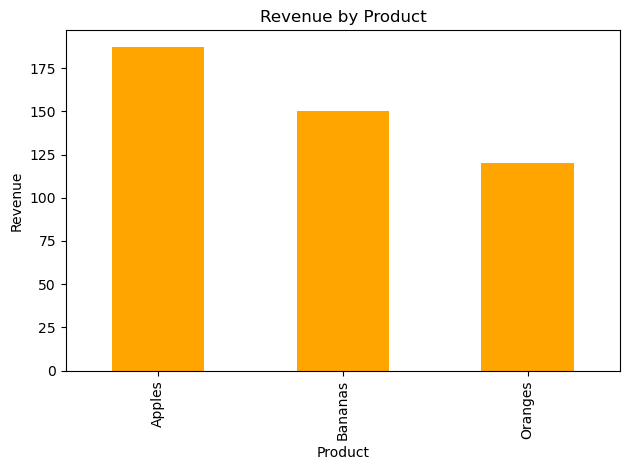

In [6]:
print("📊 Sales Summary:")
print(df)

plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [7]:
import pandas as pd

with sqlite3.connect("sales_data.db") as conn:
    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
    """
    df = pd.read_sql_query(query, conn)

print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
   product  total_qty  revenue
0   Apples         75    187.5
1  Bananas        125    150.0
2  Oranges         40    120.0
